This notebook can be run in your browser without installing any software, using Google Colab:

https://colab.research.google.com/github/mmaz/racecar_fall19/blob/master/notebooks/numpy_opencv_intro.ipynb

You can then execute each notebook cell in the browser, using `Ctrl+Enter` when your cursor is inside a cell, or by pressing the **Play** button on the left of the cell. 

Read through the linked tutorials, then try changing and re-running some of the existing cells (Ctrl+Enter will also re-execute a selected cell) and finally, go through some of the suggested exercises at the bottom of the page.

In [1]:
# Import the python libraries used in the notebook: matplotlib, numpy, and opencv

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
# random array of real numbers uniformly drawn between (0,1)

img = np.random.random((20,30,3))

# this corresponds to an image of width = 30 pixels, 
# height = 20 pixels, and 3 color channels (red, green blue)

# view a portion of the image, using numpy slicing:
print(img[:3,:3,:])

[[[0.95181668 0.96163954 0.60303064]
  [0.2279042  0.84698642 0.79313064]
  [0.08283545 0.02610746 0.01980462]]

 [[0.44815496 0.48713001 0.3581491 ]
  [0.10771475 0.93198816 0.46596441]
  [0.82868733 0.48308102 0.70535109]]

 [[0.28008939 0.53915392 0.49338924]
  [0.41360511 0.7904566  0.82633585]
  [0.48484405 0.72707305 0.80877246]]]


Read more about indexing into numpy arrays using slicing here:

https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html

In [3]:
# increase range to be between 0-255
img = img * 255

# convert to integers between 0-255 (standard image format for OpenCV)
img = img.astype(np.uint8)

# uint8 means "unsigned 8-bit integer"

The multiplication above relies on array broadcasting. Read more about array broadcasting here:

https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html

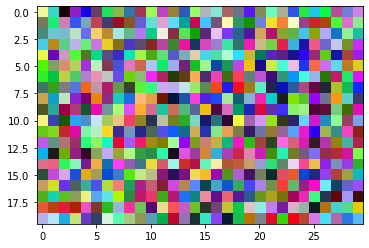

In [4]:
plt.imshow(img);

Running the following cell allows you to download images for use in your notebook using URLs. Note that you can also specify a name for the file using the `-O` flag. For instance:

```
!wget https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT2ShLfP8Hh5Aunn7S9STqocxhxNDW4i-G2bC6nNExtiI2zhasd  -O tf_logo.png
```

Remember to match the extension with the type of image file (e.g., `jpg`, `png`)

In [ ]:
# download a racecar image
!wget https://mit-racecar.github.io/icra2019-workshop/assets/img/racecar.jpg

Simple OpenCV operations

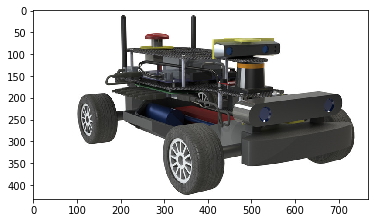

In [5]:
# opening
img = cv2.imread("racecar.jpg")

# opencv uses BGR (Blue,Green,Red) channel ordering. Matplotlib expects RGB

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img);

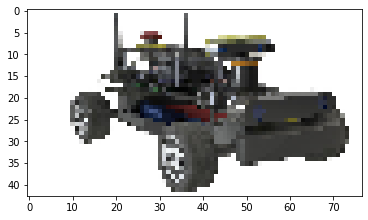

In [6]:
# Resizing
tiny = cv2.resize(img, None,fx=0.1, fy=0.1, interpolation = cv2.INTER_CUBIC)
plt.imshow(tiny);

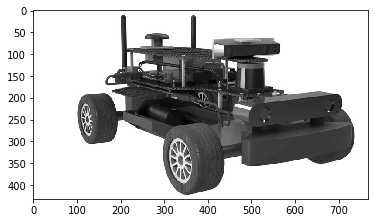

In [7]:
#grayscale
imgray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(imgray, cmap='gray');

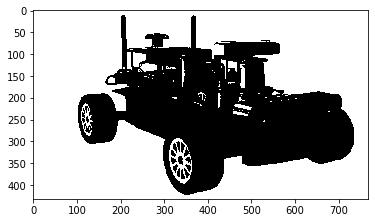

In [8]:
# thresholding
_,thr = cv2.threshold(imgray,127,255,cv2.THRESH_BINARY)
plt.imshow(thr, cmap='gray');

Read more about thresholding here:
    
https://docs.opencv.org/4.1.2/d7/d4d/tutorial_py_thresholding.html

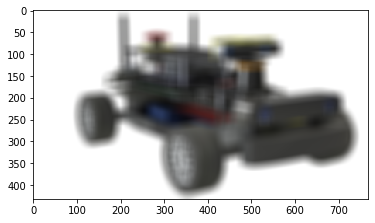

In [9]:
# blurring
b = cv2.blur(img, (25,25))
plt.imshow(b);

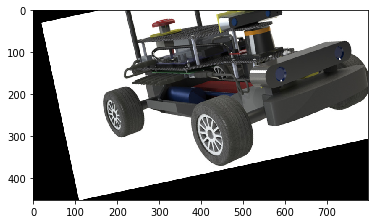

In [10]:
# Rotating and translating 
# (example from https://colab.research.google.com/drive/1RWGmqoEQdeyh5TssoGtsXsFk8hbLGtWp)

theta_degrees = -12.0
shift_x = 20
shift_y = 30
rows, cols, _ = img.shape

radians = theta_degrees * np.pi / 180
M = [
        [np.cos(radians), -np.sin(radians), shift_x], 
        [np.sin(radians),  np.cos(radians), shift_y]
    ]

M = np.array(M)
rows += int(shift_x)
cols += int(shift_y)

res = cv2.warpAffine(img, M, (cols,rows))

plt.imshow(res);

The above example uses a numpy matrix. See here for simpler ways to specify rotations and translations:
    
https://docs.opencv.org/3.4.1/da/d6e/tutorial_py_geometric_transformations.html

# Exercises:

Find some images online and try out the following OpenCV operations:

Blending:

https://docs.opencv.org/3.4.1/d0/d86/tutorial_py_image_arithmetics.html

Finding Regions of Interest (ROIs):

https://docs.opencv.org/3.4.1/d3/df2/tutorial_py_basic_ops.html

Filtering (e.g., averaging kernels)

https://docs.opencv.org/3.4.1/d4/d13/tutorial_py_filtering.html

Morphology:

https://docs.opencv.org/3.4.1/d9/d61/tutorial_py_morphological_ops.html

